In [1]:
# Import required libraries
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load the split datasets (ensure the correct path is provided)
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

# # Optional: Convert y_train and y_test to 1D arrays if needed
# y_train = y_train.values.ravel()
# y_test = y_test.values.ravel()

# Trainning the models

In [3]:
# Train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Train Neural Network (MLPClassifier) model
nn_model = MLPClassifier(max_iter=1000)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_pred)

# Train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

C:\Users\GG\AppData\Local\Temp\ipykernel_19524\1459019080.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
C:\Users\GG\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GG\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())
print(X_test.isnull().sum())
print(y_test.isnull().sum())

HomeTeam          0
AwayTeam          0
HTHG              0
HTAG              0
HS                0
AS                0
HST               0
AST               0
HF                0
AF                0
HC                0
AC                0
HY                0
AY                0
HR                0
AR                0
GoalDiff_HT       0
GoalDiff_FT       0
TotalHomeShots    0
TotalAwayShots    0
dtype: int64
FTR    0
dtype: int64
HomeTeam          0
AwayTeam          0
HTHG              0
HTAG              0
HS                0
AS                0
HST               0
AST               0
HF                0
AF                0
HC                0
AC                0
HY                0
AY                0
HR                0
AR                0
GoalDiff_HT       0
GoalDiff_FT       0
TotalHomeShots    0
TotalAwayShots    0
dtype: int64
FTR    0
dtype: int64


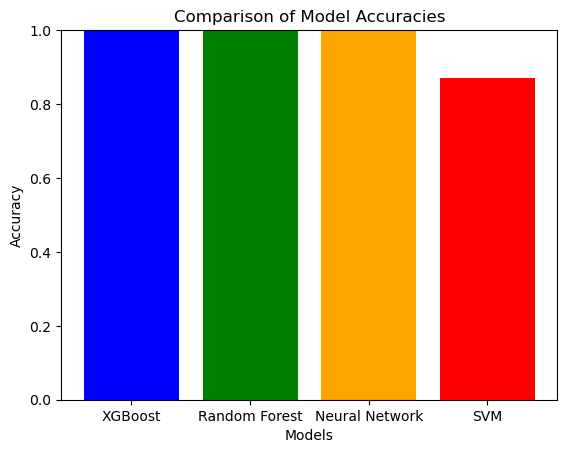

In [5]:
# Plot the accuracies in a bar chart
models = ['XGBoost', 'Random Forest', 'Neural Network', 'SVM']
accuracies = [xgb_accuracy, rf_accuracy, nn_accuracy, svm_accuracy]

plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])  # Accuracy ranges from 0 to 1
plt.show()

C:\Users\GG\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GG\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GG\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\GG\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

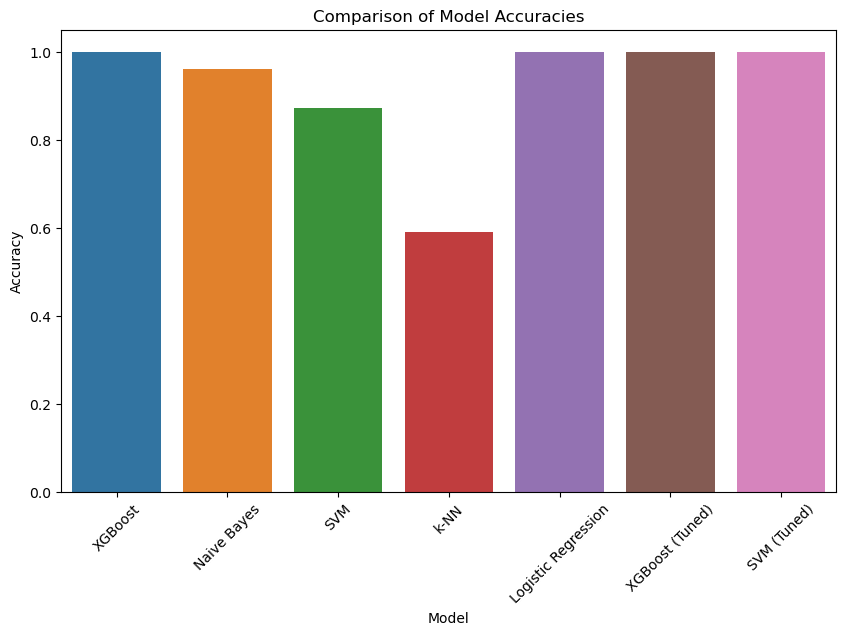

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Define models
models = {
    'XGBoost': XGBClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Train models and calculate accuracy
accuracy_results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy

# Hyperparameter Tuning with GridSearchCV for XGBoost and SVM
# XGBoost Hyperparameter tuning
xgb_params = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
xgb_grid = GridSearchCV(XGBClassifier(), xgb_params, cv=3, scoring='accuracy')
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
best_xgb_accuracy = accuracy_score(y_test, best_xgb.predict(X_test))

# SVM Hyperparameter tuning
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(), svm_params, cv=3, scoring='accuracy')
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_
best_svm_accuracy = accuracy_score(y_test, best_svm.predict(X_test))

# Update accuracy results after tuning
accuracy_results['XGBoost (Tuned)'] = best_xgb_accuracy
accuracy_results['SVM (Tuned)'] = best_svm_accuracy

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()))
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from tabulate import tabulate  # For creating a table

# Ensure y is a 1-dimensional array

# Initialize models
models = {
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss'),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Fit models, collect metrics
metrics = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    
    metrics.append([name, accuracy, precision, recall, f1_score])

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Print the table
print(tabulate(metrics_df, headers='keys', tablefmt='grid'))

C:\Users\GG\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GG\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GG\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\GG\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

+----+---------------------+------------+-------------+----------+------------+
|    | Model               |   Accuracy |   Precision |   Recall |   F1 Score |
+====+=====================+============+=============+==========+============+
|  0 | XGBoost             |   1        |    1        | 1        |   1        |
+----+---------------------+------------+-------------+----------+------------+
|  1 | Naive Bayes         |   0.960396 |    0.964185 | 0.964185 |   0.964185 |
+----+---------------------+------------+-------------+----------+------------+
|  2 | SVM                 |   0.871287 |    0.85307  | 0.85104  |   0.851922 |
+----+---------------------+------------+-------------+----------+------------+
|  3 | k-NN                |   0.589109 |    0.539608 | 0.552606 |   0.542568 |
+----+---------------------+------------+-------------+----------+------------+
|  4 | Logistic Regression |   1        |    1        | 1        |   1        |
+----+---------------------+------------


XGBoost Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


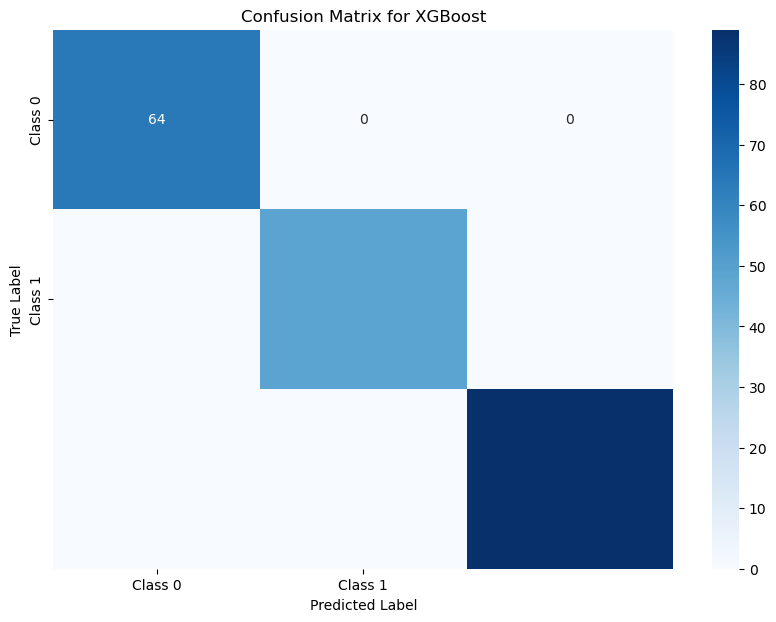


Naive Bayes Metrics:
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96


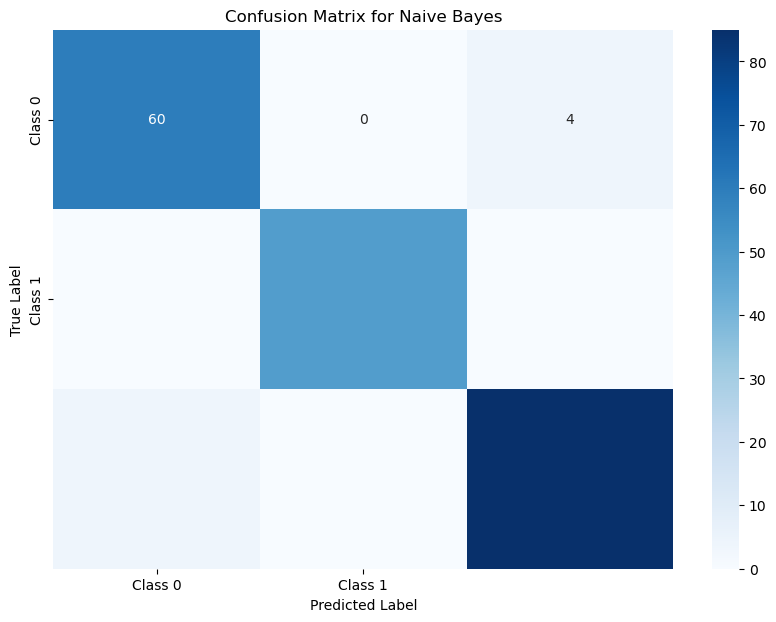


SVM Metrics:
Accuracy: 0.87
Precision: 0.85
Recall: 0.85
F1 Score: 0.85


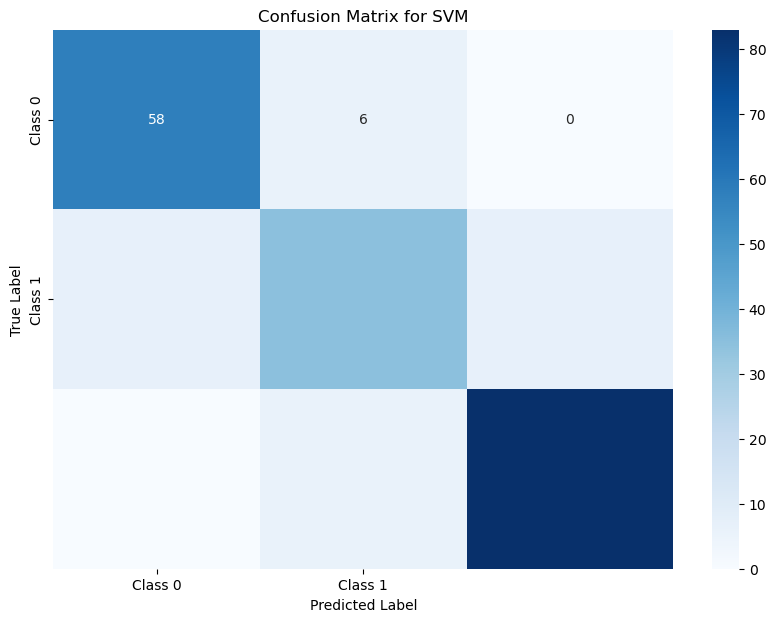


k-NN Metrics:
Accuracy: 0.59
Precision: 0.54
Recall: 0.55
F1 Score: 0.54


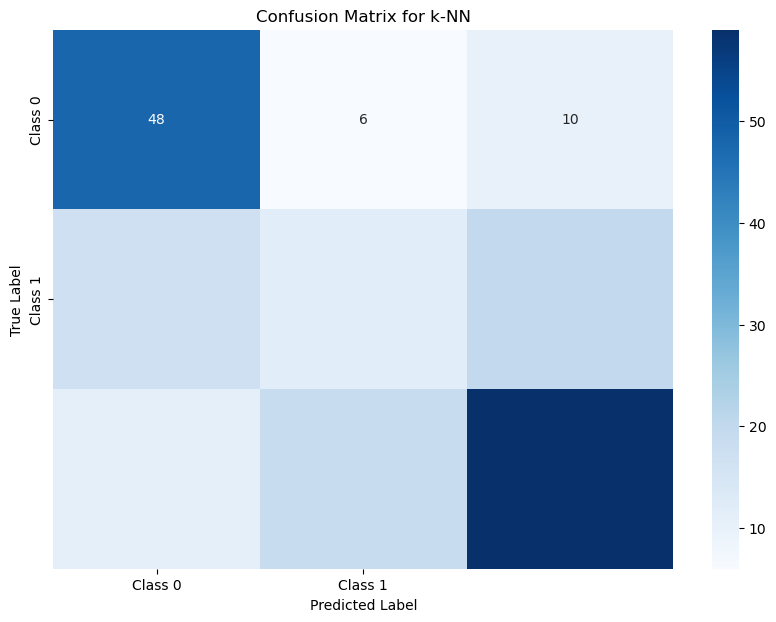


Logistic Regression Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


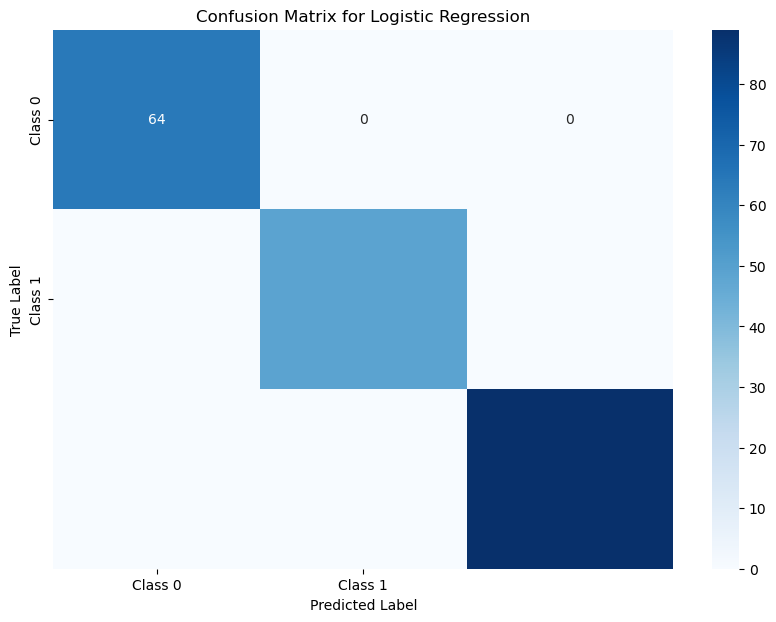

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from tabulate import tabulate

# Load datasets
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()  # Flatten y_train
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv').values.ravel()  # Flatten y_test

# Initialize models
models = {
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss'),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Fit models, collect metrics, and plot confusion matrices
for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    
    print(f"\n{name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1_score:.2f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Class 0', 'Class 1'], 
                yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

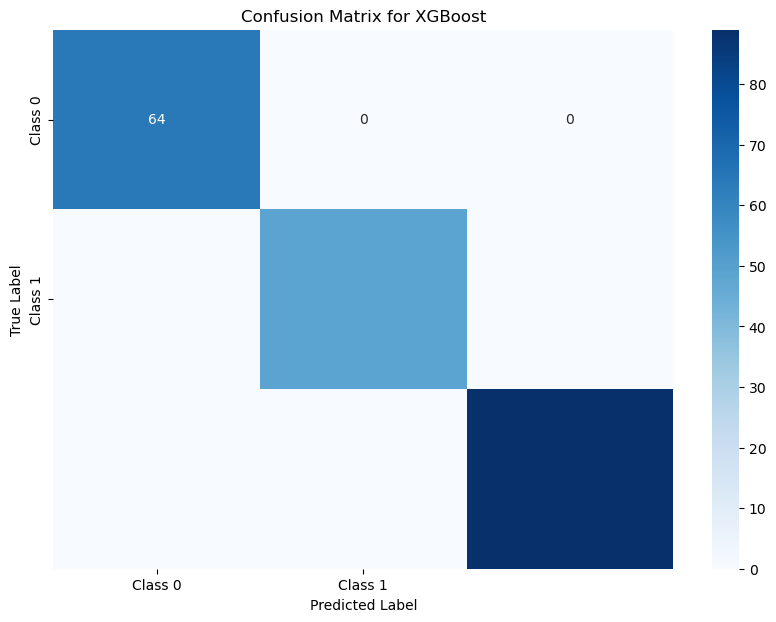

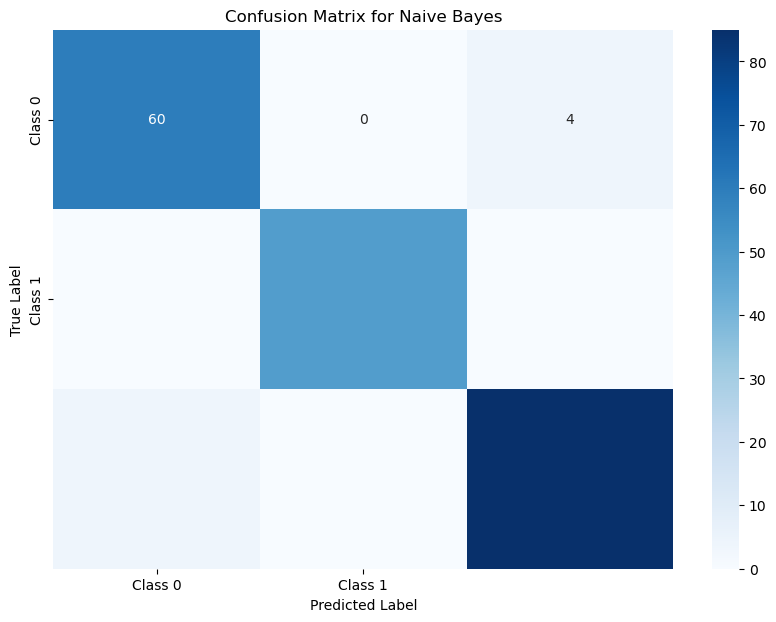

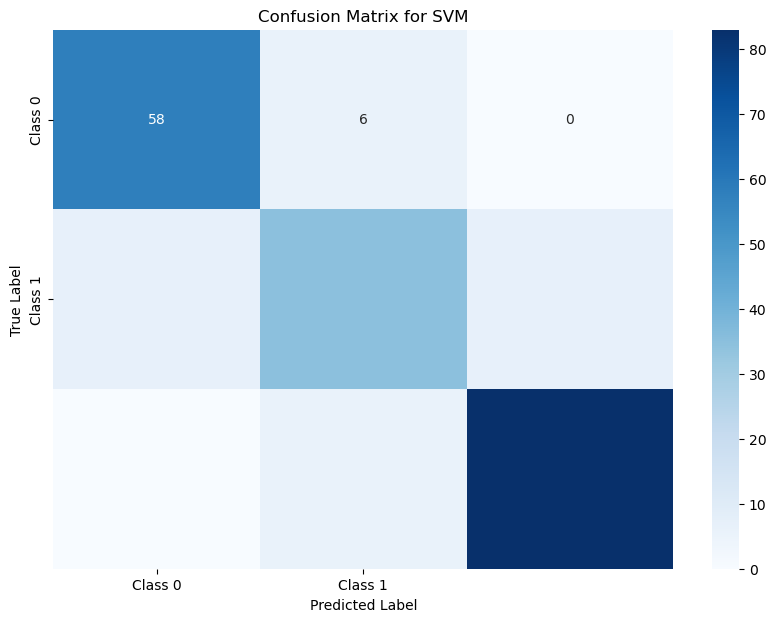

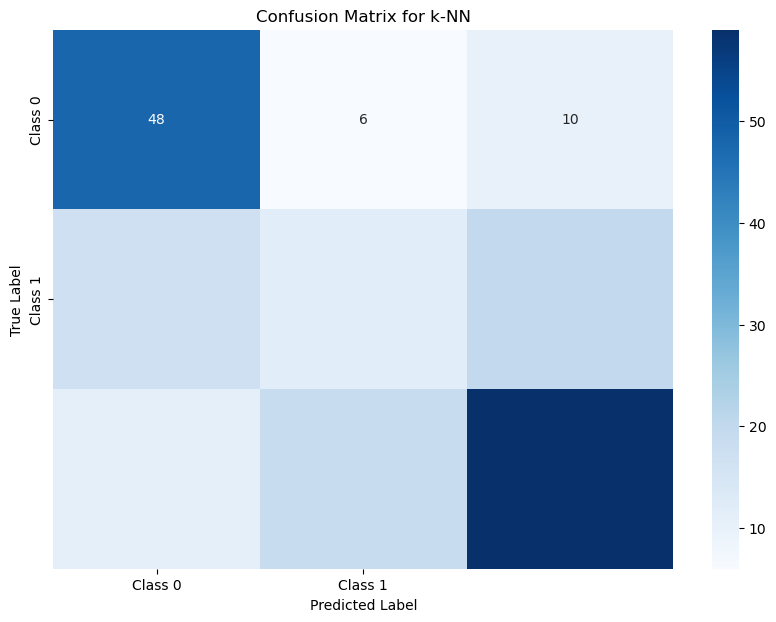

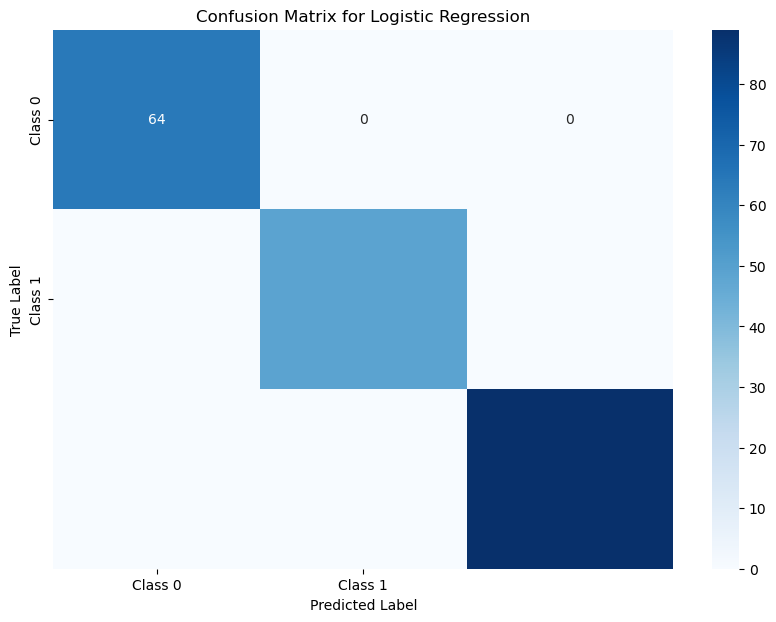


Model Performance Metrics:
+---+---------------------+--------------------+--------------------+--------------------+--------------------+
|   |        Model        |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+---+---------------------+--------------------+--------------------+--------------------+--------------------+
| 0 |       XGBoost       |        1.0         |        1.0         |        1.0         |        1.0         |
| 1 |     Naive Bayes     | 0.9603960396039604 | 0.9641853932584269 | 0.9641853932584269 | 0.9641853932584269 |
| 2 |         SVM         | 0.8712871287128713 | 0.8530702551979147 | 0.8510399946495452 | 0.8519219248480651 |
| 3 |        k-NN         | 0.5891089108910891 | 0.5396082066691174 |  0.55260643583276  | 0.5425684671569176 |
| 4 | Logistic Regression |        1.0         |        1.0         |        1.0         |        1.0         |
+---+---------------------+--------------------+--------------------+-------

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from tabulate import tabulate

# Load datasets
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()  # Flatten y_train
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv').values.ravel()  # Flatten y_test

# Initialize models
models = {
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss'),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Store metrics
metrics = []

# Fit models, collect metrics, and plot confusion matrices
for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    
    # Store metrics
    metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    })
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Class 0', 'Class 1'], 
                yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Convert metrics to DataFrame and print
metrics_df = pd.DataFrame(metrics)
print("\nModel Performance Metrics:")
print(tabulate(metrics_df, headers='keys', tablefmt='pretty'))

# Highlight the best algorithm based on F1 Score (or other criteria)
best_model = metrics_df.loc[metrics_df['F1 Score'].idxmax()]
print("\nBest Model:")
print(best_model)

# Propose a name for the best algorithm
best_model_name = best_model['Model']
if best_model_name == 'XGBoost':
    proposed_name = 'XGBoost Pro'
elif best_model_name == 'Naive Bayes':
    proposed_name = 'Bayes Best'
elif best_model_name == 'SVM':
    proposed_name = 'SVM Supreme'
elif best_model_name == 'k-NN':
    proposed_name = 'k-NN Elite'
elif best_model_name == 'Logistic Regression':
    proposed_name = 'Logistic Legend'
else:
    proposed_name = 'Model X'

print(f"\nProposed Name for Best Model: {proposed_name}")